<a href="https://colab.research.google.com/github/JulianRios1/talentotech2/blob/master/MatrizEnergeticaLimpiezaDeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agosto 20 de 2025
## Limpieza de datos en un proyecto de Machine Learning

Encabezado donde se importan las librerías que se van a usar en el proyecto

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Se importa el dataset en formato .csv desde la carpeta de Google Drive y se convierte a Dataframe

In [ ]:
df_datos = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataBase/Meta_FNCER__Incorporar_en_la_matriz_energética_nueva_capacidad_instalada_a_partir_de_Fuentes_No_Convencionales_de_Energía_Renovable_-_FNCER_20250821.csv")
df_datos.head()# .head() muestra las primeras 5 filas del dataframe

,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,"176,832","30,665","79,206,000,000",51,"51,635"
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.80,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,"47,040","8,157","42,140,000,000",68,"13,736"
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,"38,688","6,709","34,658,000,000",56,"11,297"
3,EL PASO SOLAR (ENEL GREEN POWER),Solar,67.00,CESAR,EL PASO,20,20250,2019-04-05T00:00:00.000,"321,600","55,769","288,100,000,000",466,"93,907"
4,SOLAR CASTILLA ECP,Solar,20.00,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,"96,000","16,647","86,000,000,000",139,"28,032"


In [ ]:
# Tamaño del dataset
df_datos.shape

(158, 13)

In [ ]:
# Información general del Dataset
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Proyecto                  158 non-null    object 
 1   Tipo                      158 non-null    object 
 2   Capacidad                 158 non-null    float64
 3   Departamento              158 non-null    object 
 4   Municipio                 158 non-null    object 
 5   Código Departamento       158 non-null    int64  
 6   Código Municipio          158 non-null    int64  
 7   Fecha estimada FPO        158 non-null    object 
 8   Energía [kWh/día]         158 non-null    object 
 9   Usuarios                  158 non-null    object 
 10  Inversión estimada [COP]  158 non-null    object 
 11  Empleos estimados         158 non-null    object 
 12  Emisiones CO2 [Ton/año]   158 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 16.2+ KB


In [ ]:
#necesito cambiar los datos de object a float
# Descripción del dataset a partir de estadísticos básicos
columns_float = ['Capacidad','Energía [kWh/día]','Usuarios','Empleos estimados','Emisiones CO2 [Ton/año]']

for column in columns_float:
    df_datos[column] = pd.to_numeric(df_datos[column], errors='coerce')
    df_datos[column] = df_datos[column].astype(float)
    df_datos[column] = df_datos[column].fillna(0)



df_datos.describe()

,Capacidad,Código Departamento,Código Municipio,Energía [kWh/día],Usuarios,Empleos estimados,Emisiones CO2 [Ton/año]
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,37.971646,42.829114,41551.797468,39.322785,44.753165,133.063291,40.373418
std,78.068671,26.605922,27283.549553,151.361055,149.210222,199.061290,134.823049
min,0.010000,5.000000,23.000000,0.000000,0.000000,0.000000,0.000000
25%,2.275000,17.500000,13675.500000,0.000000,0.000000,10.000000,0.000000
50%,9.900000,44.000000,44847.000000,0.000000,0.000000,68.500000,0.000000
75%,20.750000,70.000000,68514.750000,0.000000,0.000000,139.000000,0.000000
max,700.000000,94.000000,94001.000000,960.000000,941.000000,835.000000,855.000000


In [ ]:
# Eliminar duplicados
df_datos.drop_duplicates
df_datos.shape

(158, 13)

Identificar filas con valores nulos y tratamiento

In [ ]:
# Contar la cantidad de filas con valores nulos
df_datos.isnull().sum()

,0
Proyecto,0
Tipo,0
Capacidad,0
Departamento,0
Municipio,0
Código Departamento,0
Código Municipio,0
Fecha estimada FPO,0
Energía [kWh/día],0
Usuarios,0


La fila **calories_day** contiene 19 datos nulos. Trataremos, por ahora, con esa columna.

<Axes: >

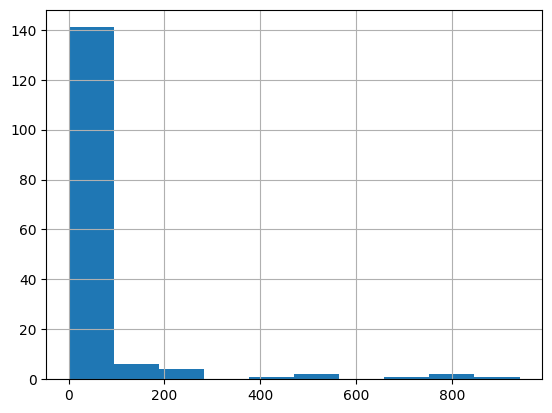

In [ ]:
# Teniendo en cuenta que el tipo de datos de esta columna es "float64" (números decimales), procedemos a crear un histograma de frecuencias de esa columna
df_datos['Usuarios'].hist()

<Axes: >

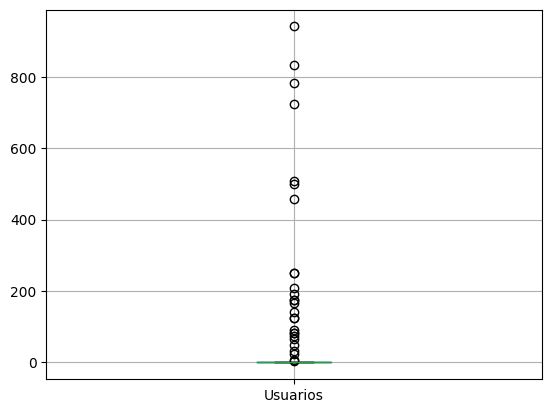

In [ ]:
# Usaremos un gráfico de caja-bigote para ver si existen valores outliers
df_datos.boxplot(column='Usuarios')

In [ ]:
# Si tomamos la decisión de imputar los valores no nulos de esa columna con el promedio de los datos, procedemos de la siguiente manera
df_datos['Usuarios'].fillna(df_datos['Usuarios'].mean())#, inplace=True)
df_datos_nulos = df_datos.isnull().sum()
display(df_datos_nulos[df_datos_nulos > 0]) # Muestra TODOS las columnas que poseen datos nulos

,0


In [ ]:
# Identify row where "GPA" is not a number
display(df_datos[pd.to_numeric(df_datos['GPA'], errors='coerce').isnull()])

# Convert to NaN the data in the column "GPA" that are not a number
df_datos['GPA'] = pd.to_numeric(df_datos['GPA'], errors='coerce')
#df_datos.info()

# Display the rows in "GPA" that are NaN
display(df_datos[df_datos['GPA'].isnull()])

# Impute the NaN data in the column "GPA" with the mean and save into a new dataframe
df_datos_media = df_datos['GPA'].fillna(df_datos['GPA'].mean(), inplace=False)
df_datos_mediana = df_datos['GPA'].fillna(df_datos['GPA'].median(), inplace=False)
df_datos_moda = df_datos['GPA'].fillna(df_datos['GPA'].mode(), inplace=False)
#df_datos.info()

# Crear histograma de los datos de la columna "GPA"
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas, tamaño de la figura
fig.suptitle('Histogramas de los datos de la columna "GPA" con diferentes imputaciones')
df_datos_media.hist(ax = axes[0]) # Histograma imputado con la media
axes[0].set_title('Imputación con la media')
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Frecuencia')

df_datos_mediana.hist(ax = axes[1]) # Histograma imputado con la mediana
axes[1].set_title('Imputación con la mediana')
axes[1].set_xlabel('Valor')
axes[1].set_ylabel('Frecuencia')

df_datos_moda.hist(ax = axes[2]) # Histograma imputado con la moda
axes[2].set_title('Imputación con la moda')
axes[2].set_xlabel('Valor')
axes[2].set_ylabel('Frecuencia')

plt.show()

KeyError: 'GPA'

Los tres histogramas muestran cambios poco significativos en la distribución de frecuencias de los valores de la columna "GPA". Ante esta situación, se puede optar por cualquiera de las tres imputaciones.
En este caso, optaremos por imputar con el promedio de los datos.

# Agosto 21 de 2025

In [ ]:
#Imput the NaN data ofthe column "GPA" with the mean
df_datos['GPA'].fillna(df_datos['GPA'].mean())#, inplace=True)

# Crear un boxplot con los datos de la coluna "GPA"
df_datos.boxplot(column='GPA')

El gráfico de caja-bigote muestra tres valores atípicos en los datos de la columna "GPA".

Podemos hacer un análisis similar con los datos de la columna Weight para identificar aquellos valores que no son numéricos

In [ ]:
# Identify row where "weight" is not a number
display(df_datos[pd.to_numeric(df_datos['weight'], errors='coerce').isnull()])

# Convert to NaN the data in the column "WEIGTH" that are not a number
df_datos['weight'] = pd.to_numeric(df_datos['weight'], errors='coerce')
#df_datos.info()

# Display the rows in "WEIGTH" that are NaN
display(df_datos[df_datos['weight'].isnull()])

# Impute the NaN data in the column "WEIGTH" with the mean and save into a new dataframe
df_datos_media = df_datos['weight'].fillna(df_datos['weight'].mean(), inplace=False)
df_datos_mediana = df_datos['weight'].fillna(df_datos['weight'].median(), inplace=False)
df_datos_moda = df_datos['weight'].fillna(df_datos['weight'].mode(), inplace=False)
#df_datos.info()

# Crear histograma de los datos de la columna "WEIGTH"
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas, tamaño de la figura
fig.suptitle('Histogramas de los datos de la columna "weight" con diferentes imputaciones')
df_datos_media.hist(ax = axes[0]) # Histograma imputado con la media
axes[0].set_title('Imputación con la media')
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Frecuencia')

df_datos_mediana.hist(ax = axes[1]) # Histograma imputado con la mediana
axes[1].set_title('Imputación con la mediana')
axes[1].set_xlabel('Valor')
axes[1].set_ylabel('Frecuencia')

df_datos_moda.hist(ax = axes[2]) # Histograma imputado con la moda
axes[2].set_title('Imputación con la moda')
axes[2].set_xlabel('Valor')
axes[2].set_ylabel('Frecuencia')

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Sección nueva

En el gráfico se observa que los histogramas en donde se hizo imputación con la media y la mediana son muy similares. El gráfico donde se hizo imputación con la moda y muestra diferencias en la distribución de los datos.<br>
Se procede a hacer la imputación con la media.

In [ ]:
#Imput the NaN data ofthe column "weight" with the mean
df_datos['weight'].fillna(df_datos['weight'].mean())#, inplace=True)

# Crear un boxplot con los datos de la coluna "weight"
df_datos.boxplot(column='weight')

## Análisis bivariado

El **análisis bivariado** es un análisis de **correlación** entre dos variables. Esto significa la evaluación del comportamiento de una variable con respecto al comportamiento de la otra.<br>
Una manera de previsualizar si existe o no correlación entre dos variables es usar un gráfico de dispersión.

In [ ]:
# Create a scatter plot with de data in the columns "GPA" and "weight"
df_datos.plot.scatter(x='GPA', y='weight')

El gráfico de dispersión no muestra una correlación entre las variables estudiadas y sí muesta la existencia de datos atípicos: los menores a 2.75 para la variable GPA y los superiores a 200 en la variable weight.<br>
Se procede a eliminarlos de la muestra

In [ ]:
# Eliminate the outliers data in the columns "GPA"
df_datos = df_datos[(df_datos['GPA'] >= 2.75) & (df_datos['GPA'] <= 4.0)]

# Eliminate the outliers data in the columns "GPA"
df_datos = df_datos[(df_datos['weight'] >= 50) & (df_datos['weight'] <= 200)]

Creamos un nuevo gráfico de dispersión con los datos depurados

In [ ]:
# Create a scatter plot with de data in the columns "GPA" and "weight"
df_datos.plot.scatter(x='GPA', y='weight')

## Análisis multivariado
Es un análisis análogo al bivariado: explorar la correlación entre pares de variables usando todas al mismo tiempo

In [ ]:
#Create a new dataframe with only numeric columns of the original dataframe
df_datos_num = df_datos.select_dtypes(include=['int64', 'float64'])
df_datos_num.shape
df_datos_num

#Create a correlation matrix with the data of the dataframe
df_corr = df_datos_num.corr()
df_corr


# Create a heatmap with the correlation matrix
#sns.heatmap(df_corr, annot=True)